In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Assignment 1: Profiling

In this assignment, you will get practice using Python to profile the data set, *dataSeoulBike.csv*.

You have a dataset of daily rentals from a bike rental service in Seoul, Korea. The dataset has the following columns:
* 'Date': The date that the row of data is from.
* 'RentedBikeCount': The total number of bike rentals for that day.
* 'Forecast': The manager's rough, categorical forecast as to how much rental activity the day would have. 'Gold' is the highest expected rentals; 'Silver' is the second-highest; 'Normal' is all other days.
* 'Temperature': The day's temperature (in degrees Celsius).
* 'Humidity': The percent humidity
* 'WindSpeed': The wind speed in meters per second.
* 'Rainfall': The amount of rain (in millimeters).
* 'Season': The season in which the date falls (Fall, Winter, Spring, or Summer)

## Importing the Data & Initial Data Checks

### Q1. Read in the data set, *dataSeoulBike.csv* and save it as a variable called `df`.
No explanation needed for this question

In [1]:
# Enter your code here
import pandas
df = pandas.read_csv("dataSeoulBike.csv")
df

,Date,RentedBikeCount,Forecast,Temperature,Humidity,WindSpeed,Rainfall,Season
0,2018-02-15,270,Normal,12.9,14,4.3,NaN,Winter
1,2018-09-23,1031,Silver,22.7,44,1.4,NaN,Fall
2,2018-03-18,106,Normal,5.6,55,0.4,NaN,Spring
3,2018-01-07,40,Normal,4.4,58,0.7,NaN,Winter
4,2018-11-09,0,Normal,11.3,88,3.7,NaN,Fall
...,...,...,...,...,...,...,...,...
8317,2018-10-31,324,Normal,6.6,66,1.0,NaN,Fall
8318,2018-11-19,629,Normal,4.2,42,2.2,NaN,Fall
8319,2018-10-12,1488,Normal,16.9,34,1.2,NaN,Fall
8320,2018-02-21,365,Normal,13.3,14,2.9,NaN,Winter


### Q2. Check the data types -- which variables are numeric and which variables are categorical? Does it appear that all variables are being read in correctly? If not, please explain.
*[type your response here]*

In [2]:
# Enter your code here
df.dtypes
# rf: mostly looks correct to me, curious about the Date, Forecast, and Season all being "object" type, I would expect the latter two to be Strings and the Date to be a Date or Timestamp format 



Date                object
RentedBikeCount      int64
Forecast            object
Temperature        float64
Humidity             int64
WindSpeed          float64
Rainfall           float64
Season              object
dtype: object

### Q3. Are there any missing values and, if so, how many and for which variable(s)?
*[type your response here]*

In [3]:
# Enter your code here
df.isna().sum()
# 7,820 missing values for Rainfall

Date                  0
RentedBikeCount       0
Forecast              0
Temperature           0
Humidity              0
WindSpeed             0
Rainfall           7820
Season                0
dtype: int64

## Profiling: Numeric Variables

### Q4. Get the summary statistics for the numeric variables in this data set.
No explanation needed for this question.

In [4]:
# Enter your code here
df.describe()

,RentedBikeCount,Temperature,Humidity,WindSpeed,Rainfall
count,8322.000000,8322.000000,8322.000000,8322.000000,502.000000
mean,706.149724,15.801682,58.221581,1.730269,2.512550
std,648.101064,9.055946,20.370276,1.036351,4.008058
min,0.000000,-7.800000,0.000000,0.000000,0.100000
25%,192.000000,8.900000,42.000000,0.900000,0.500000
50%,503.000000,15.400000,57.000000,1.500000,1.000000
75%,1066.000000,22.700000,74.000000,2.300000,2.500000
max,3556.000000,39.400000,98.000000,7.400000,35.000000


### Q5. Based on the summary statistics, describe the distribution of the `RentedBikeCount` variable. Be sure to give a measure of center and spread in your description. Also, based on the summary stats alone, do you think the distribution is roughly symmetric or skewed? (Do not create a graph for this question.)
*rf: Across 8,322 records, with a minimum of 0, a maximum of 3556, and a mean of 706. The 50% mark at 503, it seems this data probably skews towards the lower and closer to the midpoint between 503 and 706 vs skewing to the right/top/max of distribution at 3556*

### Q6. Based on the summary statistics alone, what concerns might you have about the `Rainfall` variable?
*rf: Limited availability of data is the biggest concern. An added concern might be that the Max is significantly higher than all other summary stats.  *

## Profiling: Categorical Variables

### Q7. How many rows of data have a `Forecast` of "Gold"?
*rf: 257 have value "Gold"*

In [5]:
# Enter your code here
df["Forecast"].value_counts()

Forecast
Normal    6376
Silver    1689
Gold       257
Name: count, dtype: int64

### Q8. What % of rows in the data set have a `Forecast` of "Silver"? Be sure to round your answer to 2 decimals in both the response as well as the code.
*rf: 20.30% (from 0.2030) *

In [6]:
df["Forecast"].value_counts(normalize=True).round(4)


Forecast
Normal    0.7662
Silver    0.2030
Gold      0.0309
Name: proportion, dtype: float64

### Q9. Create a contingency table to show the relative counts between the `Forecast` and `Season` variables. Be sure to include row and column totals.
No explanation needed for this question.

In [22]:
# Enter your code here
pandas.crosstab(df.Forecast, df.Season, margins=True)

Season,Fall,Spring,Summer,Winter,All
Forecast,,,,,
Gold,61,49,147,0,257
Normal,1438,1619,1287,2032,6376
Silver,564,438,670,17,1689
All,2063,2106,2104,2049,8322


### Q10. Create the same table as in question 9, but show the relative %'s out of the total. Which season had the highest % of "Silver" forecast days?
*rf: Summer at 8.01% rounded (from 0.080509)*

In [23]:
# Enter your code here
pandas.crosstab(df.Forecast, df.Season, normalize=True, margins=True)

Season,Fall,Spring,Summer,Winter,All
Forecast,,,,,
Gold,0.007330,0.005888,0.017664,0.000000,0.030882
Normal,0.172795,0.194545,0.154650,0.244172,0.766162
Silver,0.067772,0.052632,0.080509,0.002043,0.202956
All,0.247897,0.253064,0.252824,0.246215,1.000000


## Basic Visualizations

### Q11. Create a graph to show the distribution of the `Temperature` variable. Based on your graph, does it look like the variable is roughly symmetric or skewed?
*rf: looks fairly symmetric to me, fewer bigger jumps vs more smaller drops at opposing sides fo the distribution*

<Axes: ylabel='Frequency'>

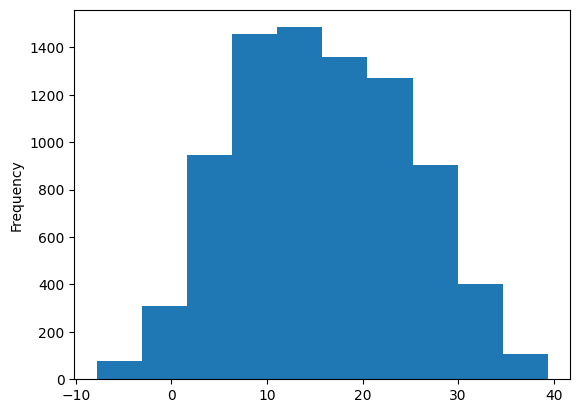

In [27]:
# Enter your code here
df["Temperature"].plot.hist()

### Q12. Create a scatter plot to show the relationship between `Temperature` (on the x-axis) and `RentedBikeCount` (on the y-axis). Does your graph suggest there is a relationship and, if so, is it positive or negative?
*rf: it does appear to suggest that higher temps, up to ~27 degrees, leads to more rentals*

<Axes: xlabel='Temperature', ylabel='RentedBikeCount'>

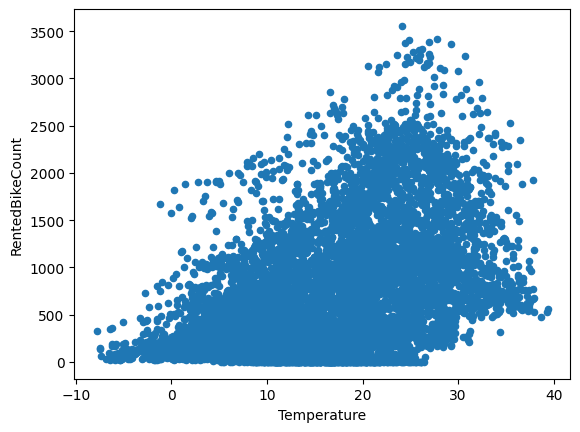

In [28]:
# Enter your code here
df.plot.scatter(x = "Temperature", y = "RentedBikeCount")

### Q13. Create a stacked bar chart showing the breakdown of each `Forecast` category by `Season`. The bar chart should show the `Forecast` categories on the x-axis and each bar split up by color according to `Season`. The bar chart should also show relative %'s, with each bar equaling 100%.
No explanation needed for this question.

<Axes: xlabel='Forecast'>

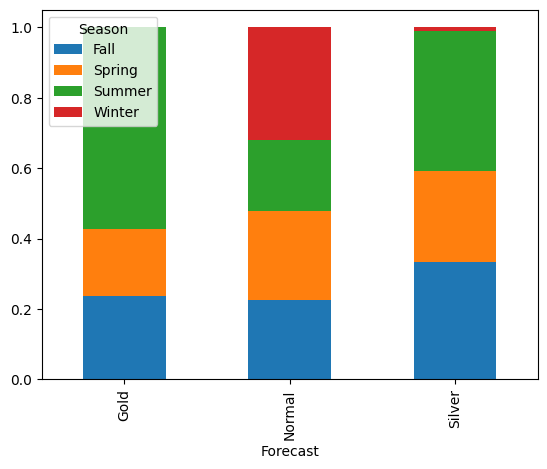

In [33]:
# Enter your code here
pandas.crosstab(df["Forecast"], df["Season"], normalize="index").plot.bar(stacked = True)

### Q14. Create a side-by-side box plot of `Temperature` broken out by `Forecast`. Based on your box plot, which `Forecast` appears to have the lowest median temperature?
*rf: The normal forecast appears to have the lowest median temp around 12 degrees*

<Axes: title={'center': 'Temperature'}, xlabel='Forecast'>

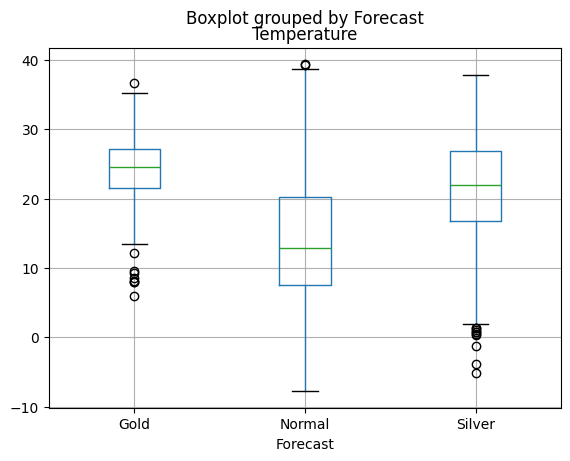

In [37]:
# Enter your code here
df.boxplot(column = "Temperature", by = "Forecast")